# Route's arcs infrastructure analysis

This code allows you to estimate the following variables related to the routes' infrastructure. 
r_LCycle = Length of cycle paths (in kilometers). 
r_Hls = High levels of stress. Length of major roads (in kilometers) including arterial and collectors roads.
r_Lls = Low levels of stress. Length of minor roads (in kilometers) including service and local roads.
r_l80 = Length of 80km/h roads (in kilometers) along the route.
O_l60 = Length of 60km/h roads (in kilometers) along the route.
O_l40 = Length of 40km/h roads (in kilometers) along the route.
O_l30 = Length of 30km/h roads (in kilometers) along the route.
O_l5 = Length of 5km/h roads (in kilometers) along the route.

All the arcs related to each route are assumed to be previously estimated. These are found in the Shapes folder: Shapes/Routes_arcs  

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route 

In [2]:
route = 1002
db = gpd.read_file('../Shapes/Routes_arcs/R' +"%s" % (route) +'_phd_arcs_VF.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,OBJECTID,bridge,from_,highway,name,oneway,osmid,to,ID_PhD,Cyclypath,...,Shape_Leng,Heri_tot,k30_tot,Pheri,Pz30,N_rutas,frecuencia,p_acc,N_Heri,geometry
0,27336,None,359737754,trunk,Autopista Sur,True,98778184,359737280,27336,0,...,199.005925,0.0,0.0,0.0,0.0,6,894,0.0,0.0,LINESTRING Z (833608.7498000003 1182974.0582 0...
1,6994,None,4406316200,trunk,Carrera 63; Avenida Regional,True,440846748,4384504036,6994,0,...,133.569546,0.0,0.0,0.0,0.0,13,2709,0.0,0.0,LINESTRING Z (835122.3284999998 1187123.606699...
2,25703,None,359737280,trunk,None,True,32048527,359730986,25703,0,...,99.563105,0.0,0.0,0.0,0.0,1,225,0.0,0.0,LINESTRING Z (833664.9963999996 1182783.8978 0...
3,25704,None,359730986,trunk,None,True,98732781,359730987,25704,0,...,39.496291,0.0,0.0,0.0,0.0,1,225,0.0,0.0,LINESTRING Z (833620.0000999998 1182696.056700...
4,29619,None,359744660,residential,Calle 42 C,False,98778200,359744661,29619,0,...,59.234328,0.0,0.0,0.0,0.0,1,225,0.0,0.0,LINESTRING Z (833615.4115000004 1182628.2009 0...


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 38 columns):
OBJECTID      71 non-null int64
bridge        3 non-null object
from_         71 non-null object
highway       71 non-null object
name          68 non-null object
oneway        71 non-null object
osmid         69 non-null object
to            71 non-null object
ID_PhD        71 non-null object
Cyclypath     71 non-null int64
Ped_path      71 non-null int64
X_from        71 non-null float64
Y_from        71 non-null float64
Z_from        71 non-null float64
X_to          71 non-null float64
Y_to          71 non-null float64
Z_to          71 non-null float64
slope         71 non-null float64
speed         71 non-null float64
v_80          71 non-null float64
v_60          71 non-null float64
v_40          71 non-null float64
v_30          71 non-null float64
v_5           71 non-null float64
Long          71 non-null float64
Cycle_long    71 non-null float64
Ped_long      71 non

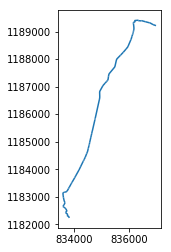

In [4]:
db.plot()

In [5]:
#LCycle = db['Cycle_long']
#Long = db['Long']
Cyclelong = db['Cycle_long']
v80 = db['v_80']
v60 = db['v_60']
v40 = db['v_40']
v30 = db['v_30']
v5 = db['v_5']

In [12]:
db['LCycle']=0
db['lv80'] = 0
db['lv60'] = 0
db['lv40'] = 0
db['lv30'] = 0
db['lv5'] = 0
db['Hls'] = 0
db['Lls'] = 0

In [13]:
LCycle=db['LCycle']
lv80 = db['lv80']
lv60 = db['lv60']
lv40 = db['lv40']
lv30 = db['lv30']
lv5 = db['lv5']
Hls = db['Hls']
Lls = db['Lls']

In [15]:
db[['LCycle','lv80','lv60','lv40','lv30','lv5','Hls','Lls']]

,LCycle,lv80,lv60,lv40,lv30,lv5,Hls,Lls
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


In [9]:
n = len(db)
print (n)

71


This part of the code checks for double length counting when the arc includes cycling infrastructure and additionally is labeled as a type of vehicle road.  

In [18]:
for i in db.index[0:n]:
    
    if Cyclelong.iloc[i] == 0:
        lv80.iloc[i] = v80.iloc[i]    
    else:
        lv80.iloc[i] = 0
        
    if Cyclelong.iloc[i] == 0:
        lv60.iloc[i] = v60.iloc[i]
    else:
        lv60.iloc[i] = 0
        
    if Cyclelong.iloc[i] == 0:
        lv40.iloc[i] = v40.iloc[i]
    else:
        lv40.iloc[i] = 0
        
    if Cyclelong.iloc[i] == 0:
        lv30.iloc[i] = v30.iloc[i]
    else:
        lv30.iloc[i] = 0
        
    if Cyclelong.iloc[i] == 0:
        lv5.iloc[i] = v5.iloc[i]
    else:
        lv5.iloc[i] = 0
    
    if Cyclelong.iloc[i] > 0:
        LCycle.iloc[i] = Cyclelong.iloc[i]
    else:
        LCycle.iloc[i] = 0

High and Low Level of stress estimation

In [19]:
for i in db.index[0:n]:
    Hls.iloc[i] = lv80.iloc[i] + lv60.iloc[i] + lv40.iloc[i]
    Lls.iloc[i] = lv30.iloc[i] + lv5.iloc[i]

In [20]:
results = pd.DataFrame ({
        "route": db['ruta'],
        "LCycle" : db['LCycle'],
        "lv80" : db['lv80'],
        "lv60" : db['lv60'],
        "lv40" : db['lv40'],
        "lv30" : db['lv30'],
        "lv5" : db['lv5'],
        "Hls" : db['Hls'],
        "Lls" : db['Lls']})
print(results)

    route  LCycle        lv80        lv60        lv40        lv30         lv5  \
0    1002       0  199.005875    0.000000    0.000000    0.000000    0.000000   
1    1002       0  133.569599    0.000000    0.000000    0.000000    0.000000   
2    1002       0   99.563101    0.000000    0.000000    0.000000    0.000000   
3    1002       0   39.496308    0.000000    0.000000    0.000000    0.000000   
4    1002       0    0.000000    0.000000    0.000000   59.234259    0.000000   
5    1002       0    0.000000    0.000000   18.552391    0.000000    0.000000   
6    1002       0    0.000000    0.000000    0.000000   46.448582    0.000000   
7    1002       0    0.000000    0.000000    0.000000  156.355867    0.000000   
8    1002       0   73.807918    0.000000    0.000000    0.000000    0.000000   
9    1002       0  127.767364    0.000000    0.000000    0.000000    0.000000   
10   1002       0   74.116258    0.000000    0.000000    0.000000    0.000000   
11   1002       0   30.83862

In [17]:
results.to_csv('../Tables/OUT/route_infra/R' +"%s" %(route)+'_infra.txt',index=False, header=True)

In [22]:
LCycle = ((db['LCycle']).sum())/1000
print (LCycle)
lv80 = ((db['lv80']).sum())/1000
print (lv80)
lv60 = ((db['lv60']).sum())/1000
print (lv60)
lv40 = ((db['lv40']).sum())/1000
print (lv40)
lv30 = ((db['lv30']).sum())/1000
print (lv30)
lv5 = ((db['lv5']).sum())/1000
print (lv5)
Hls = ((db['Hls']).sum())/1000
Lls = ((db['Lls']).sum())/1000
print (Hls)
print (Lls)

0.0
7.40666139489597
0.12506918180419999
0.4356510772288
0.5127984625792998
0.42063849904440004
7.96738165392897
0.9334369616237


In [24]:
infra_ruta = pd.DataFrame ({
        "route":[route],
        "LCycle":[LCycle],
        "lv80":[lv80],
        "lv60":[lv60],
        "lv40":[lv40],
        "lv30":[lv30],
        "lv5":[lv5],
        "Hls":[Hls],
        "Lls":[Lls]})
infra_ruta.to_csv('../Tables/OUT/route_infra/R' +"%s" %(route)+'_infra.txt',index=False, header=True)

# Route's arcs infrastructure analysis for all routes

The code requires the list of all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [25]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

## Correcting infrastructure data

In [19]:
for r in routes:
    db = gpd.read_file('../Shapes/Routes_arcs/R' +"%s" % (r) +'_phd_arcs_VF.shp')
    Cyclelong = db['Cycle_long']
    v80 = db['v_80']
    v60 = db['v_60']
    v40 = db['v_40']
    v30 = db['v_30']
    v5 = db['v_5']
    db['LCycle']=0
    db['lv80'] = 0
    db['lv60'] = 0
    db['lv40'] = 0
    db['lv30'] = 0
    db['lv5'] = 0
    db['Hls'] = 0
    db['Lls'] = 0
    LCycle=db['LCycle']
    lv80 = db['lv80']
    lv60 = db['lv60']
    lv40 = db['lv40']
    lv30 = db['lv30']
    lv5 = db['lv5']
    Hls = db['Hls']
    Lls = db['Lls']
    
    n = len(db)
    for i in db.index[0:n]:
        if Cyclelong.iloc[i] == 0:
            lv80.iloc[i] = v80.iloc[i]    
        else:
            lv80.iloc[i] = 0
        
        if Cyclelong.iloc[i] == 0:
            lv60.iloc[i] = v60.iloc[i]
        else:
            lv60.iloc[i] = 0
        
        if Cyclelong.iloc[i] == 0:
            lv40.iloc[i] = v40.iloc[i]
        else:
            lv40.iloc[i] = 0
        
        if Cyclelong.iloc[i] == 0:
            lv30.iloc[i] = v30.iloc[i]
        else:
            lv30.iloc[i] = 0
        
        if Cyclelong.iloc[i] == 0:
            lv5.iloc[i] = v5.iloc[i]
        else:
            lv5.iloc[i] = 0
    
        
        if Cyclelong.iloc[i] > 0:
            LCycle.iloc[i] = Cyclelong.iloc[i]
        else:
            LCycle.iloc[i] = 0
    
    for i in db.index[0:n]:
        Hls.iloc[i] = lv80.iloc[i] + lv60.iloc[i] + lv40.iloc[i]
        Lls.iloc[i] = lv30.iloc[i] + lv5.iloc[i]
    results = pd.DataFrame ({
        "route": db['ruta'],
        "LCycle" : db['LCycle'],
        "lv80" : db['lv80'],
        "lv60" : db['lv60'],
        "lv40" : db['lv40'],
        "lv30" : db['lv30'],
        "lv5" : db['lv5'],
        "Hls" : db['Hls'],
        "Lls" : db['Lls']})
    LCycle = ((db['LCycle']).sum())/1000
    lv80 = ((db['lv80']).sum())/1000
    lv60 = ((db['lv60']).sum())/1000
    lv40 = ((db['lv40']).sum())/1000
    lv30 = ((db['lv30']).sum())/1000
    lv5 = ((db['lv5']).sum())/1000
    Hls = ((db['Hls']).sum())/1000
    Lls = ((db['Lls']).sum())/1000
    infra_ruta = pd.DataFrame ({
        "route":[route],
        "LCycle":[LCycle],
        "lv80":[lv80],
        "lv60":[lv60],
        "lv40":[lv40],
        "lv30":[lv30],
        "lv5":[lv5],
        "Hls":[Hls],
        "Lls":[Lls]})
    infra_ruta.to_csv('../Tables/OUT/route_infra/R' +"%s" %(r)+'_infra.txt',index=False, header=True)

## Route infrastructure report 

This part of the code summarizes the Routes' infrastructure analysis in only one table. Please copy it to a text file and save. 

In [20]:
print ('route,r_LCycle,r_lv80,r_lv60,r_lv40,r_lv30,r_lv5,r_Hls,r_Lls')
for r in routes:
    df=np.loadtxt('../datos/tables/OUT/route_infrastructure20181028/R' +"%s" %(r)+'_infra.txt', delimiter=',',skiprows=1)
    print ((str(i)),(df[1]),(df[2]),(df[3]),(df[4]),(df[5]),(df[6]),(df[7]),(df[8])) 

ruta,r_LCycle,r_lv80,r_lv60,r_lv40,r_lv30,r_lv5,r_Hle,r_Lle
(1002.0, 0.0, 7.4066613949000004, 0.12506918180400001, 0.43565107722899998, 0.51279846257899997, 0.42063849904400002, 7.9673816539300004, 0.93343696162400003)
(1006.0, 0.89511938812900005, 0.0, 0.0, 1.89034589932, 0.40771704041899998, 0.10505105045300001, 1.89034589932, 0.51276809087099995)
(1009.0, 4.5457247257300004, 0.0, 1.6055370759400001, 1.62393996548, 0.0, 1.05564808947, 3.22947704142, 1.05564808947)
(1013.0, 0.0, 0.69061674761000003, 2.2462124757300002, 0.0, 0.44034870422799999, 0.0, 2.9368292233400002, 0.44034870422799999)
(10291.0, 1.29021733367, 0.0, 1.0522678506500001, 0.025307835932099999, 0.0, 0.112807278333, 1.0775756865799999, 0.112807278333)
(10292.0, 0.0, 0.0, 0.437222713195, 1.09548781222, 0.206590628276, 0.0, 1.53271052542, 0.206590628276)
(1050.0, 0.12463484217199999, 0.0, 4.8727837634600002, 6.1159226883900004, 0.0, 0.0, 10.988706451800001, 0.0)
(1052.0, 0.10164094682200001, 1.505926463, 3.849530485549999